In [10]:
import pandas as pd
import json
from math import log2
from math import factorial
from matplotlib import pyplot as plt

In [13]:
# storing data of concern in  a new text file
data = pd.read_csv('Q3_dataset_new.txt', sep='\t', header=None)
data.to_csv('Q3_data.csv', sep=' ', header=None, index=False)
data = pd.read_csv('Q3_data.csv', sep=' ', header=None)
# print(data.head)

data_dict = {}
for i in range(len(data)):
    row = data.iloc[i][0]
    row = row.split(' ')
    # print(row)
    data_dict[i] = {}
    data_dict[i]['score'] = row[0]
    # print(len(row))
    for j in range(1, len(row)-1):
        row[j] = row[j].split(':')
        data_dict[i][row[j][0]] = row[j][1]
# print(data_dict)

# writing the dictionary to a json file
with open('Q3_data.json', 'w') as f:
    json.dump(data_dict, f, indent = 4)


In [14]:
# Calculating DCG

data_dict_copy = data_dict.copy()

# sorting the data dict by score in descending order
data_dict = sorted(data_dict.values(), key=lambda x: x['score'], reverse=True)

# calculating DCG using the score and storing the DCG in a new column in the data dictionary
for i in range(len(data_dict)):
    dcg = float(data_dict[0]['score'])
    for j in range(1,len(data_dict[i])-1):
        dcg += (float(data_dict[i]['score']))/(log2(j+1))
    data_dict[i]['dcg'] = dcg

# print dcg from data dictionary
# print("DCG Values are:")
# for i in range(len(data_dict)):
#     print(data_dict[i]['dcg'])

# Storing the data dict in a new json file in decreasing order of DCG
with open('Q3_DCG.json', 'w') as f:
    json.dump(data_dict, f, indent = 4)

# calculating the number of zeroes, ones, twos and threes in score column of data_dict
zeroes = 0
ones = 0
twos = 0
threes = 0
fours = 0
for i in range(len(data_dict)):
    if data_dict[i]['score'] == '0':
        zeroes += 1
    elif data_dict[i]['score'] == '1':
        ones += 1
    elif data_dict[i]['score'] == '2':
        twos += 1
    elif data_dict[i]['score'] == '3':
        threes += 1
    elif data_dict[i]['score'] == '4':
        fours += 1

# print(zeroes, ones, twos, threes, fours)
# print(zeroes+ones+twos+threes+fours)
# print(len(data_dict))

# calculate the number of files that can be made
files = factorial(zeroes)*factorial(ones)*factorial(twos)*factorial(threes)*factorial(fours)


In [15]:
print("Number of files that can be made are: ", files)

Number of files that can be made are:  19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


In [16]:
# Calculating nDCG using IDCG

# calculating IDCG using the score and storing the IDCG in a new column in the data dictionary
for i in range(len(data_dict)):
    idcg = float(data_dict[0]['score'])
    for j in range(1,len(data_dict[i])-1):
        idcg += (float(data_dict[0]['score']))/(log2(j+1))
    data_dict[i]['idcg'] = idcg

# printing idcg from data dictionary
# print("IDCG Values are:")
# for i in range(len(data_dict)):
#     print(data_dict[i]['idcg'])

# calculating NDCG using the score and storing the NDCG in a new column in the data dictionary
for i in range(len(data_dict)):
    ndcg = data_dict[i]['dcg']/data_dict[i]['idcg']
    data_dict[i]['ndcg'] = ndcg

# printing ndcg from data dictionary
# print("NDCG Values are:")
# for i in range(len(data_dict)):
#     print(data_dict[i]['ndcg'])

# Storing the data_dict in a new json file in decreasing order of NDCG
with open('Q3_NDCG.json', 'w') as f:
    json.dump(data_dict, f, indent = 4)

In [28]:
# Calculating nDCG at 50

ndcg50 = float(data_dict_copy[0]['score'])
max_ndcg50 = float(data_dict[0]['score'])
# print(ndcg50)
# print(max_ndcg50)
for i in range(1, 51):
    temp1 = (float(data_dict_copy[i]['score'])/log2(i+1))
    ndcg50 = ndcg50 + temp1
    temp2 = (float(data_dict[i]['score'])/log2(i+1))
    max_ndcg50 = max_ndcg50 + temp2

ndcg_50 = ndcg50/max_ndcg50
print("nDCG at position 50: ", ndcg_50)

nDCG at position 50:  0.3521042740324887


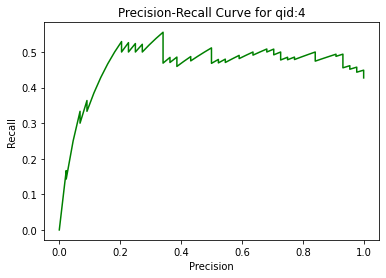

In [18]:
# Plotting a Precision-Recall curve for the query "qid:4" using feature 75

qid=[]
total = 0
for i in range(len(data_dict)):
    qid.append([int(data_dict[i]['score']), float(data_dict[i]['75'])])
    if(data_dict[i]['score'] > '0'):
        total += 1
# print(qid)

qid = sorted(qid,key=lambda x:x[1], reverse=True)
# print(qid)

precision_list = []
recall_list = []
cnt = 1
classified = 0

for ind in [data[0] for data in qid]:
    prec = classified/cnt
    reca = classified/total
    precision_list.append(prec)
    recall_list.append(reca)
    if ind > 0:
        classified += 1
    cnt = cnt+1

plt.title('Precision-Recall Curve for qid:4')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.plot(recall_list, precision_list, 'g')
plt.show()